# Wine Quality

In [1]:
import zipfile
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
zip_file_path = 'Wine Quality Dataset.zip'
extracted_folder = 'Wine_Quality_Data'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)  # Extract to the folder

# Load the Wine Quality CSV into a DataFrame
csv_file_name = os.path.join(extracted_folder, 'WineQT.csv')
df = pd.read_csv(csv_file_name)

# Display the first few rows of the dataset
print(df.head())
print(df.info())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [3]:
# Data Exploration
# Display basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Check the unique values in the 'quality' column
print(f"Unique values in 'quality' column: {df['quality'].unique()}")

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

In [4]:
# Data Preprocessing

# Define the features (X) and target (y)
X = df.drop('quality', axis=1)  # All columns except 'quality'
y = df['quality']  # Target column (quality of the wine)

# Normalize the numerical features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # This will normalize the features

# Convert the scaled features into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# Check the dimensions of the data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (914, 12)
Test data shape: (229, 12)


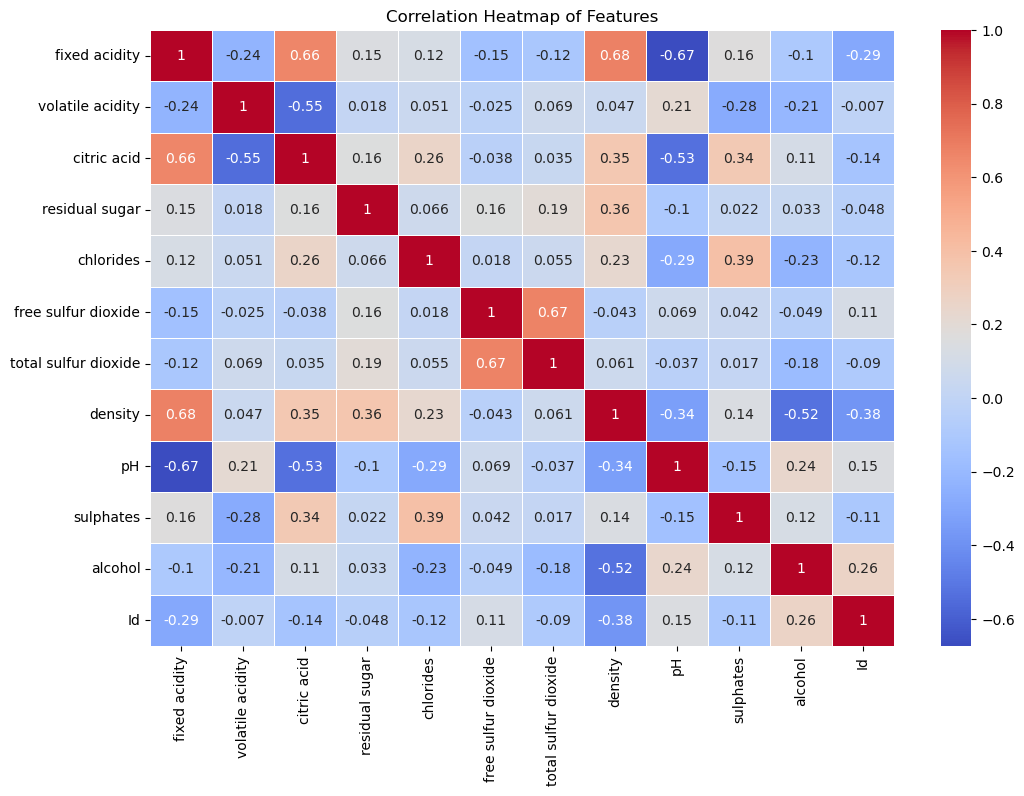

In [6]:
# Visualize correlations (Optional)
plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

# Now your data is ready to be used for model training.